# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Examples on MapReduce with Apache Spark** </center>
---
**Profesor**: Pablo Camarillo Ramirez

# Find the PySpark Installation

In [4]:
import findspark
findspark.init()

# Create SparkSession

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Celsius to Fahrenheit") \
    .master("spark://5fded284cb17:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

# Exercise: Temperature Conversion
## Create the RDD

In [12]:
temperatures_celsius = [0, 10, 20, 30, 40]
rdd = sc.parallelize(temperatures_celsius)

## Convertion Function

In [13]:
def c_to_f(c):
    return c * (9.0/5.0) + 32.0

## Map Phase

In [14]:
fahrenheit_rdd = rdd.map(c_to_f)


## Shuffle and Reduce Phases

In [ ]:
# I don't think there is a shuffle and reduce phase needed

## Collect results

In [15]:
temperatures_fahrenheit = fahrenheit_rdd.collect()
print("Temperatures in Fahrenheit:", temperatures_fahrenheit)

Temperatures in Fahrenheit: [32.0, 50.0, 68.0, 86.0, 104.0]


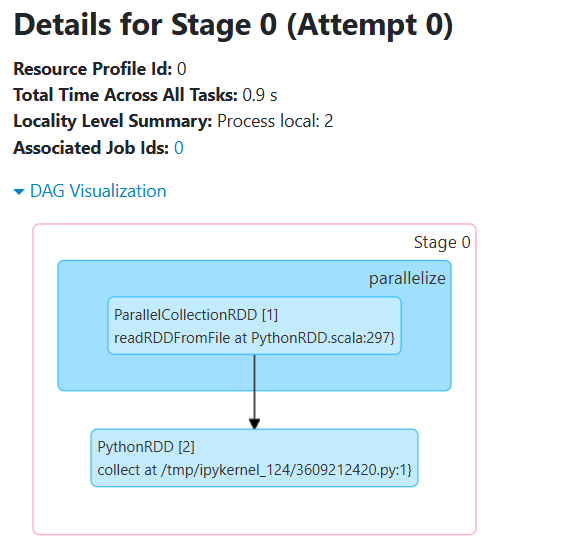

# Example: Log Analysis
## Create RDD

In [ ]:
lines = sc.textFile("/opt/spark/work-dir/data/web_access.log")

In [ ]:
lines.collect()

## Transform every line in a tuple

In [ ]:
from pcamarillor.spark_utils import parse_line
records = lines.map(parse_line)
records.collect()

## Filter data from yesterday

In [ ]:
from datetime import datetime, timezone, timedelta
from pcamarillor.spark_utils import is_yesterday, to_domain
yesterday = (datetime.now(timezone.utc).date() - timedelta(days=1)).isoformat()
yesterday

In [ ]:
y_records = records.filter(lambda record: is_yesterday(record[2], yesterday))
y_records.collect()

## Reduce by domain, user

In [ ]:
domain_user_ones = y_records.map(lambda record: ((to_domain(record[1]), record[0]), 1))
unique_domain_user = domain_user_ones.reduceByKey(lambda a, b: 1)
unique_domain_user.collect()

## Count unique users per domain

In [ ]:
domain_ones = unique_domain_user.map(lambda kv: (kv[0][0], 1))
unique_visitors_per_domain = domain_ones.reduceByKey(lambda a, b: a + b)
unique_visitors_per_domain.collect()

# Get results

In [ ]:
result = unique_visitors_per_domain.collect()
result

# Close SparkContext

In [ ]:
sc.stop()